# K-Nearest Neighbors

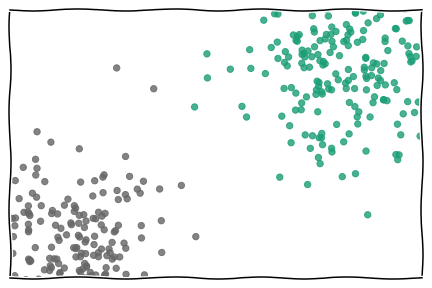

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))


class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Calcule las distancias entre 'x' y todos los ejemplos en el conjunto de entrenamiento
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Ordenamos por índices de distancia y retornamos de los primeros k vecinos
        k_idx = np.argsort(distances)[:self.k]
        # Extraemos las etiquetas de las k muestras de entrenamiento del vecino más cercano
        k_neighbor_labels = [self.y_train[i] for i in k_idx]  
        # retornamos la etiqueta de clase más común
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [2]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

(120, 4)
[5.1 2.5 3.  1.1]
(120,)
[1 2 0 2 1 0 0 0 0 1 0 1 0 2 2 0 2 2 2 2 0 2 2 1 1 1 1 1 1 0 0 2 2 2 0 0 0
 2 1 2 2 1 0 2 0 2 0 1 1 0 1 0 2 2 2 1 0 0 2 1 1 0 1 2 1 1 1 0 0 0 1 1 0 2
 1 2 2 1 0 1 2 0 0 2 2 1 1 2 0 1 2 2 2 1 0 0 0 0 2 1 2 0 0 1 1 2 1 1 2 2 2
 0 2 0 0 2 2 1 0 0]


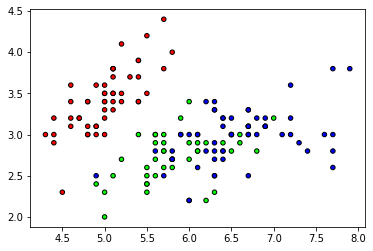

In [4]:
print(X_train.shape)
print(X_train[0])

print(y_train.shape)
print(y_train)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [5]:
k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("KNN accuracy: ", accuracy(y_test, predictions))

KNN accuracy:  1.0


## K-NN en Sklearn

None 0.8133333333333334
0.2 0.82


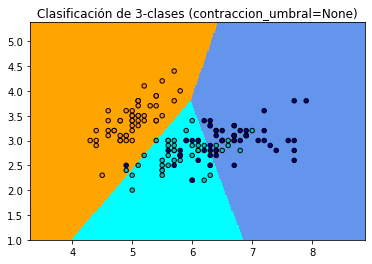

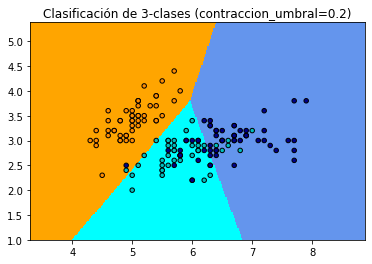

In [6]:
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

n_neighbors = 15

iris = datasets.load_iris()
# solo tomamos las dos primeras características
X = iris.data[:, :2]
y = iris.target

h = .02  # tamaño de paso en la malla

# creamos el mapa de colores
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for shrinkage in [None, .2]:
    # creamos una instancia de Neighbors Classifier y entrenamos en los datos.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    # Proteamos el límite de decisión. Para eso, asignaremos un color 
    # a cada punto de la malla [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Ponemos el resultado en una gráfica de color
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Ploteamos también los puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.title("Clasificación de 3-clases (contraccion_umbral=%r)"
              % shrinkage)
    plt.axis('tight')

plt.show()